In [ ]:
import pandas as pd
data = pd.read_csv("/lakehouse/default/Files/immunosyntheticdata.csv")

StatementMeta(, , , Waiting, )

In [ ]:
from sklearn.model_selection import train_test_split
y = data['Result_of_Treatment']
X = data.drop('Result_of_Treatment', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

StatementMeta(, , , Waiting, )

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

StatementMeta(, , , Waiting, )

###### **Decision Tree**

StatementMeta(, , , Waiting, )

2024-03-04:02:33:41,738 WARNING  [tracking_store.py:153] log_inputs not supported


[[ 0  4]
 [ 4 42]]


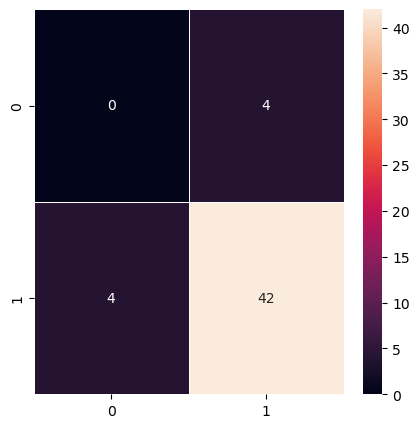

In [4]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_criterion = best_params['criterion']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

best_dtc = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth,
                                  min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, 
                                  random_state=0)

best_dtc.fit(X_train, y_train)

y_pred = best_dtc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
a=accuracy_score(y_test, y_pred)
a_loss = log_loss(y_test,y_pred)
print(a)


plt.figure(figsize=(5,5)) 
sns.heatmap(cm,annot=True , linewidth=0.5) 
print('True Negative:',cm[0,0])
print('False Negative:',cm[1,0])
print('False pasitive:',cm[0,1])
print('True positive:',cm[1,1])

###### **Random Forest**

StatementMeta(, , , Waiting, )

2024-03-04:02:34:02,818 WARNING  [tracking_store.py:153] log_inputs not supported


[[ 0  4]
 [ 0 46]]


Registered model 'sample-random-forest' already exists. Creating a new version of this model...


Model saved in run c8a9f664-3473-49fa-9232-cc4df3dd2032
Model URI: runs:/c8a9f664-3473-49fa-9232-cc4df3dd2032/random-forest-model


True Negative: 0
False Negative: 0
False pasitive: 4
True positive: 46


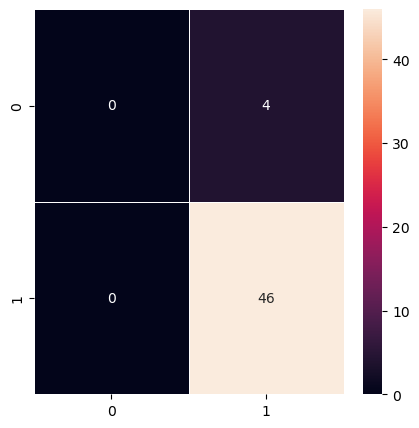

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import mlflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import mlflow.sklearn  # Import the sklearn utilities from MLflow


param_grid = {
    'max_depth': [3, 4, 5],
    'max_features': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
}
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_max_features = best_params['max_features']
best_min_samples_split = best_params['min_samples_split']
best_rfc = RandomForestClassifier(max_depth=best_max_depth, max_features=best_max_features, min_samples_split=best_min_samples_split, random_state=1)



best_rfc.fit(X_train, y_train)



y_pred1 = best_rfc.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
b=accuracy_score(y_test, y_pred1)
b_loss = log_loss(y_test,y_pred1)
print(b)

with mlflow.start_run() as run:
    # Log parameters -- though in your case, they are chosen by GridSearchCV
    mlflow.log_param('max_depth', best_max_depth)
    mlflow.log_param('max_features', best_max_features)
    mlflow.log_param('min_samples_split', best_min_samples_split)
    
    # Log metrics -- here you can store the accuracy or any other metric of interest
    mlflow.log_metric('accuracy', b)
    
    # Log the scikit-learn model
    mlflow.sklearn.log_model(best_rfc, "random-forest-model", registered_model_name="sample-random-forest")

    model_uri = "runs:/{}/random-forest-model".format(run.info.run_id)
    print("Model saved in run %s" % run.info.run_id)
    print(f"Model URI: {model_uri}")

plt.figure(figsize=(5,5)) 
sns.heatmap(cm1,annot=True , linewidth=0.5) 
print('True Negative:',cm1[0,0])
print('False Negative:',cm1[1,0])
print('False pasitive:',cm1[0,1])
print('True positive:',cm1[1,1])

###### **K-Nearest Neighbors**

StatementMeta(, , , Waiting, )

2024-03-04:02:35:40,258 WARNING  [tracking_store.py:153] log_inputs not supported


[[ 0  4]
 [ 0 46]]
0.92
True Negative: 0
False Negative: 0
False pasitive: 4
True positive: 46


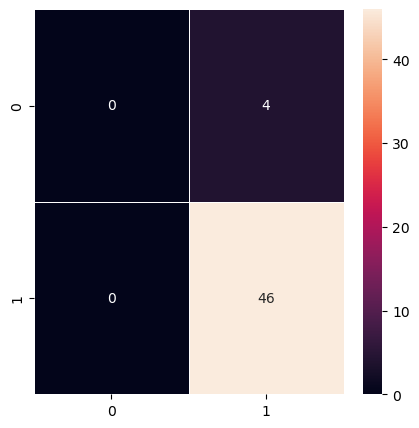

In [6]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_n_neighbors = best_params['n_neighbors']
best_metric = best_params['metric']
best_p = best_params['p']

best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_metric, p=best_p)

best_knn.fit(X_train, y_train)

y_pred2 = best_knn.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
c=accuracy_score(y_test, y_pred2)
print(c)
c_loss = log_loss(y_test,y_pred2)

plt.figure(figsize=(5,5)) 
sns.heatmap(cm2,annot=True , linewidth=0.5) 
print('True Negative:',cm2[0,0])
print('False Negative:',cm2[1,0])
print('False pasitive:',cm2[0,1])
print('True positive:',cm2[1,1])


###### **Logistic Regression**

StatementMeta(, , , Waiting, )

2024-03-04:02:35:56,512 WARNING  [tracking_store.py:153] log_inputs not supported


[[ 0  4]
 [ 0 46]]


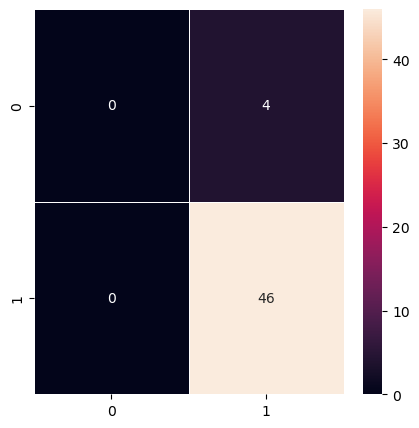

In [7]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty term ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'saga']  # Solver algorithm ('liblinear' for small datasets, 'saga' for large datasets)
}
lr = LogisticRegression(random_state = 0)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']
best_solver = best_params['solver']

best_lr = LogisticRegression(C=best_C, penalty=best_penalty, solver=best_solver, random_state=0)


best_lr.fit(X_train, y_train)

y_pred3 = best_lr.predict(X_test)

cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
d=accuracy_score(y_test, y_pred3)
print(d)
d_loss = log_loss(y_test,y_pred3)

plt.figure(figsize=(5,5)) 
sns.heatmap(cm3,annot=True , linewidth=0.5) 
print('True Negative:',cm3[0,0])
print('False Negative:',cm3[1,0])
print('False pasitive:',cm3[0,1])
print('True positive:',cm3[1,1])

###### **Naive Bayes**

StatementMeta(, , , Waiting, )

2024-03-04:02:36:04,905 WARNING  [tracking_store.py:153] log_inputs not supported


[[ 0  4]
 [ 0 46]]
0.92
True Negative: 0
False Negative: 0
False pasitive: 4
True positive: 46


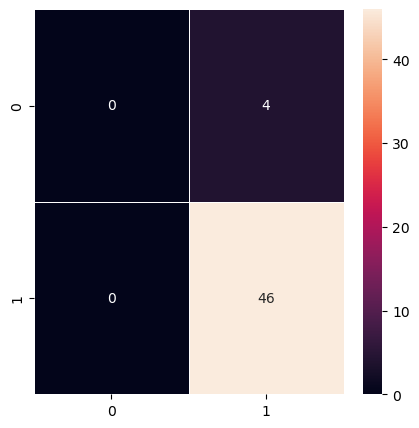

In [8]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred4 = NB.predict(X_test)

cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
e=accuracy_score(y_test, y_pred4)
print(e)
e_loss = log_loss(y_test,y_pred4)

plt.figure(figsize=(5,5)) 
sns.heatmap(cm4,annot=True , linewidth=0.5) 
print('True Negative:',cm4[0,0])
print('False Negative:',cm4[1,0])
print('False pasitive:',cm4[0,1])
print('True positive:',cm4[1,1])

###### **Support Vector Machine**

StatementMeta(, , , Waiting, )

2024-03-04:02:36:20,27 WARNING  [tracking_store.py:153] log_inputs not supported


[[ 0  4]
 [ 0 46]]
0.92


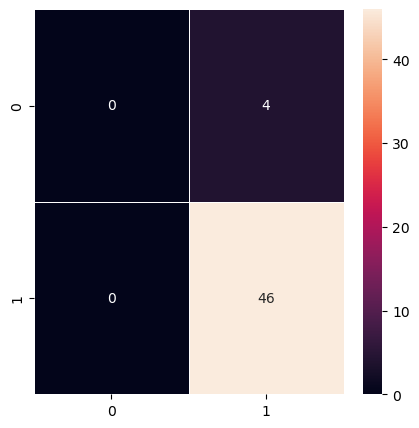

In [9]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svm = SVC(random_state = 42)

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_C = best_params['C']
best_gamma = best_params['gamma']

best_svm = SVC(C=best_C, gamma=best_gamma, kernel='rbf', random_state=42)

best_svm.fit(X_train, y_train)

y_pred5 = best_svm.predict(X_test)

cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
f=accuracy_score(y_test, y_pred5)
print(f)
f_loss = log_loss(y_test,y_pred5)

plt.figure(figsize=(5,5)) 
sns.heatmap(cm5,annot=True , linewidth=0.5) 
print('True Negative:',cm5[0,0])
print('False Negative:',cm5[1,0])
print('False pasitive:',cm5[0,1])
print('True positive:',cm5[1,1])



In [13]:
model=['Decision Tree Classification','Random Forest Classification','K-Nearest Neighbors','LogisticRegression','Naive Bayes','SVC']
accuracy=[a,b,c,d,e,f]
loss = [a_loss, b_loss, c_loss, d_loss, e_loss, f_loss]

Final_result=pd.DataFrame({'Algorithms':model ,'Accuracies':accuracy, 'Losses':loss})
Final_result

StatementMeta(, 0b444551-b23a-42a2-ba46-12bae2b52c9b, 17, Finished, Available)

,Algorithms,Accuracies,Losses
0,Decision Tree Classification,0.84,5.766985
1,Random Forest Classification,0.92,2.883492
2,K-Nearest Neighbors,0.92,2.883492
3,LogisticRegression,0.92,2.883492
4,Naive Bayes,0.92,2.883492
5,SVC,0.92,2.883492


In [14]:
from delta.tables import DeltaTable

spark_df = spark.createDataFrame(Final_result)

spark_df.write.format("delta").save("Tables/models_performance1")

delta_table = DeltaTable.forPath(spark, "Tables/models_performance1")


StatementMeta(, 0b444551-b23a-42a2-ba46-12bae2b52c9b, 18, Finished, Available)